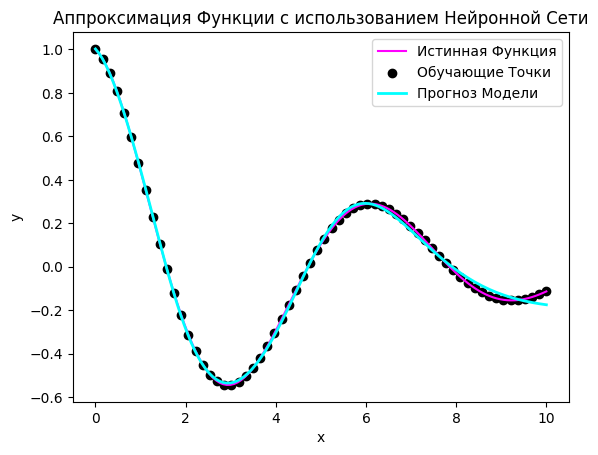

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Определение функции активации
activation_function = nn.Tanh()

# Новая целевая функция
def target_function(x):
    return np.cos(x) * np.exp(-x / 5)

# Генерация обучающих данных
batch_size_train = 64
batch_size_eval = 128

x_train = np.linspace(0, 10, num=batch_size_train).reshape(-1, 1)
y_train = target_function(x_train)

# Генерация тестовых данных
x_test = np.linspace(0, 10, num=batch_size_eval).reshape(-1, 1)
y_test = target_function(x_test)

# Определение функций модели и обучения
def train_model(x_train, y_train, x_test, units, epochs):
    x_train_tensor = torch.from_numpy(x_train).float().to(device)
    x_test_tensor = torch.from_numpy(x_test).float().to(device)
    y_train_tensor = torch.from_numpy(y_train).float().to(device)

    layer1 = nn.Linear(x_train.shape[1], units).to(device)
    layer2 = nn.Linear(units, 1).to(device)
    parameters = list(layer1.parameters()) + list(layer2.parameters())
    optimizer = optim.Adam(parameters)
    loss_fn = nn.MSELoss(reduction='mean')

    for epoch in range(epochs):
        yhat = layer2(activation_function(layer1(x_train_tensor)))
        loss = loss_fn(yhat, y_train_tensor)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    yhat_test = layer2(activation_function(layer1(x_test_tensor)))
    return yhat_test.detach().cpu().numpy()

# Обучение модели
units = 10
epochs = 10000
predictions = train_model(x_train, y_train, x_test, units, epochs)

# Визуализация результатов
plt.plot(x_test, y_test, label='Истинная Функция', color='magenta')
plt.scatter(x_train, y_train, label='Обучающие Точки', color='black', zorder=1)
plt.plot(x_test, predictions, label='Прогноз Модели', color='cyan', linewidth=2.0, zorder=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация Функции с использованием Нейронной Сети')
plt.legend()
plt.show()


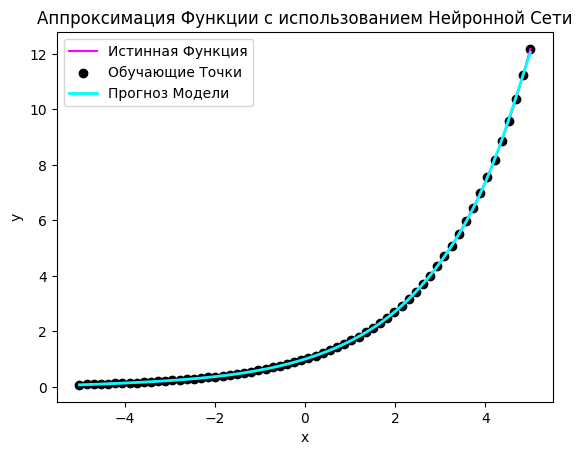

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Определение устройства
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Определение функции активации
activation_function = nn.Tanh()

# Новая целевая функция
def target_function(x):
    return np.exp(x / 2)

# Генерация обучающих данных
batch_size_train = 64
batch_size_eval = 128

x_train = np.linspace(-5, 5, num=batch_size_train).reshape(-1, 1)
y_train = target_function(x_train)

# Генерация тестовых данных
x_test = np.linspace(-5, 5, num=batch_size_eval).reshape(-1, 1)
y_test = target_function(x_test)

# Определение функций модели и обучения
def train_model(x_train, y_train, x_test, units, epochs):
    x_train_tensor = torch.from_numpy(x_train).float().to(device)
    x_test_tensor = torch.from_numpy(x_test).float().to(device)
    y_train_tensor = torch.from_numpy(y_train).float().to(device)

    # Определение модели
    layer1 = nn.Linear(x_train.shape[1], units).to(device)
    layer2 = nn.Linear(units, 1).to(device)
    parameters = list(layer1.parameters()) + list(layer2.parameters())
    optimizer = optim.Adam(parameters)
    loss_fn = nn.MSELoss(reduction='mean')

    # Обучение модели
    for epoch in range(epochs):
        yhat = layer2(activation_function(layer1(x_train_tensor)))
        loss = loss_fn(yhat, y_train_tensor)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    # Прогноз на тестовых данных
    yhat_test = layer2(activation_function(layer1(x_test_tensor)))
    return yhat_test.detach().cpu().numpy()

# Обучение модели
units = 10
epochs = 10000
predictions = train_model(x_train, y_train, x_test, units, epochs)

# Визуализация результатов
plt.plot(x_test, y_test, label='Истинная Функция', color='magenta')
plt.scatter(x_train, y_train, label='Обучающие Точки', color='black', zorder=1)
plt.plot(x_test, predictions, label='Прогноз Модели', color='cyan', linewidth=2.0, zorder=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация Функции с использованием Нейронной Сети')
plt.legend()
plt.show()